### Import the data + Display first 10 rows

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

original = pd.read_csv("train.csv")
original.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Display DataFrame Information using .info()

In [2]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Remove variables with more than 30% missing values

In [3]:
# pd.set_option('display.max_rows', None)

empty_col = original.isnull().sum()/ original.shape[0] * 100
# empty_col

rm = empty_col[empty_col > 30].index
# rm

#Drop Null Column
original.drop(rm, axis=1, inplace=True)
original.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Display with a describe() the information of SalePrice

In [4]:
original.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Display the distribution of SalePrice with a distplot

Text(0.5, 0, 'Sale Price')

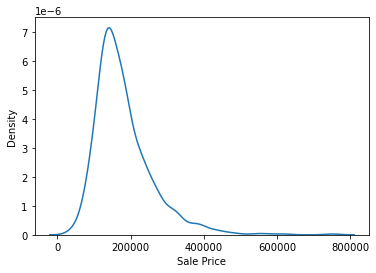

In [5]:

# plot distplot
fig,ax = plt.subplots()
sns.kdeplot(original.SalePrice)

ax.set_ylabel( "Density")
ax.set_xlabel( "Sale Price") 


/home/apprennant/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Sale Price')

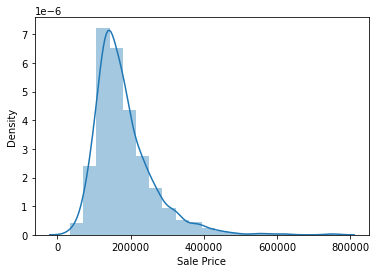

In [6]:
# plot distplot
fig,ax = plt.subplots()
sns.distplot(original.SalePrice,bins = 20, ax = ax)

ax.set_ylabel( "Density")
ax.set_xlabel( "Sale Price") 

Text(0.5, 0, 'Sale Price')

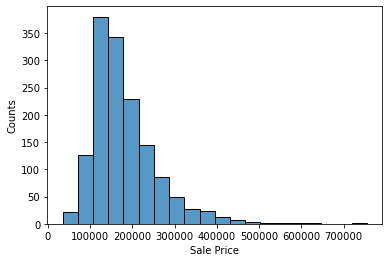

In [7]:
# plot distplot
fig,ax = plt.subplots()
sns.histplot(original.SalePrice, bins = 20, ax = ax)

ax.set_ylabel( "Counts")
ax.set_xlabel( "Sale Price") 


### Select the variables int64 + float64 to display the histograms for all of these variables

In [8]:
df = original.select_dtypes(include = ['int64','float64'])


-


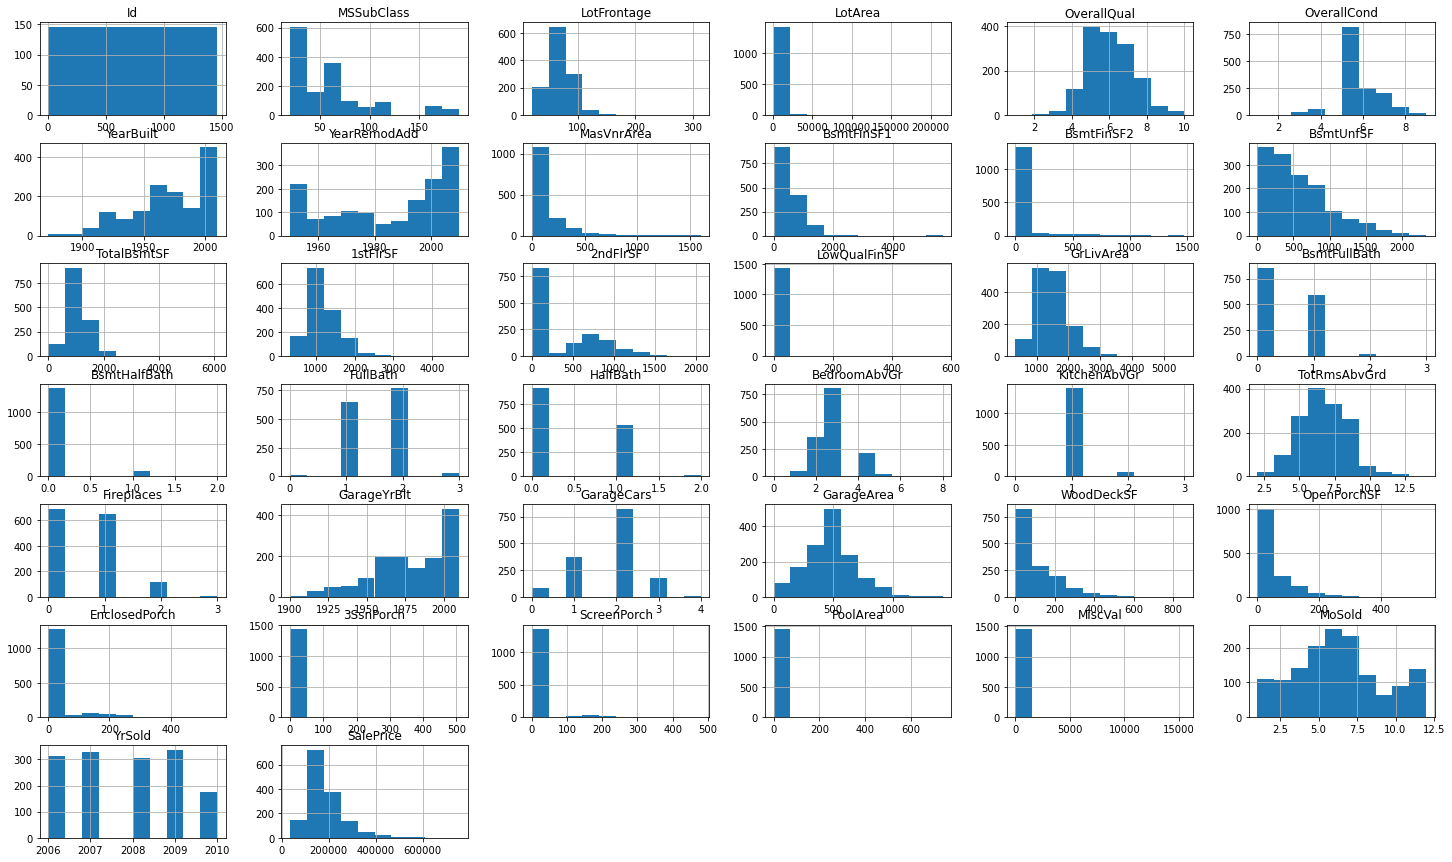

In [9]:
df = original.select_dtypes(include = ['int64','float64'])


df.hist(figsize=(25,15))
print("-")

### What is the shape of the plot crossing the 3 variables most correlated with SalePrice?

- LotFrontage
- TotalBsmtSF
- GrLivArea

### Display the 10 most correlated variables with SalePrice

In [80]:
df.corr().sort_values('SalePrice', ascending=False).index[0:11]



Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

### Create a pairplot to display the relationship between SalePrice and the selected variables

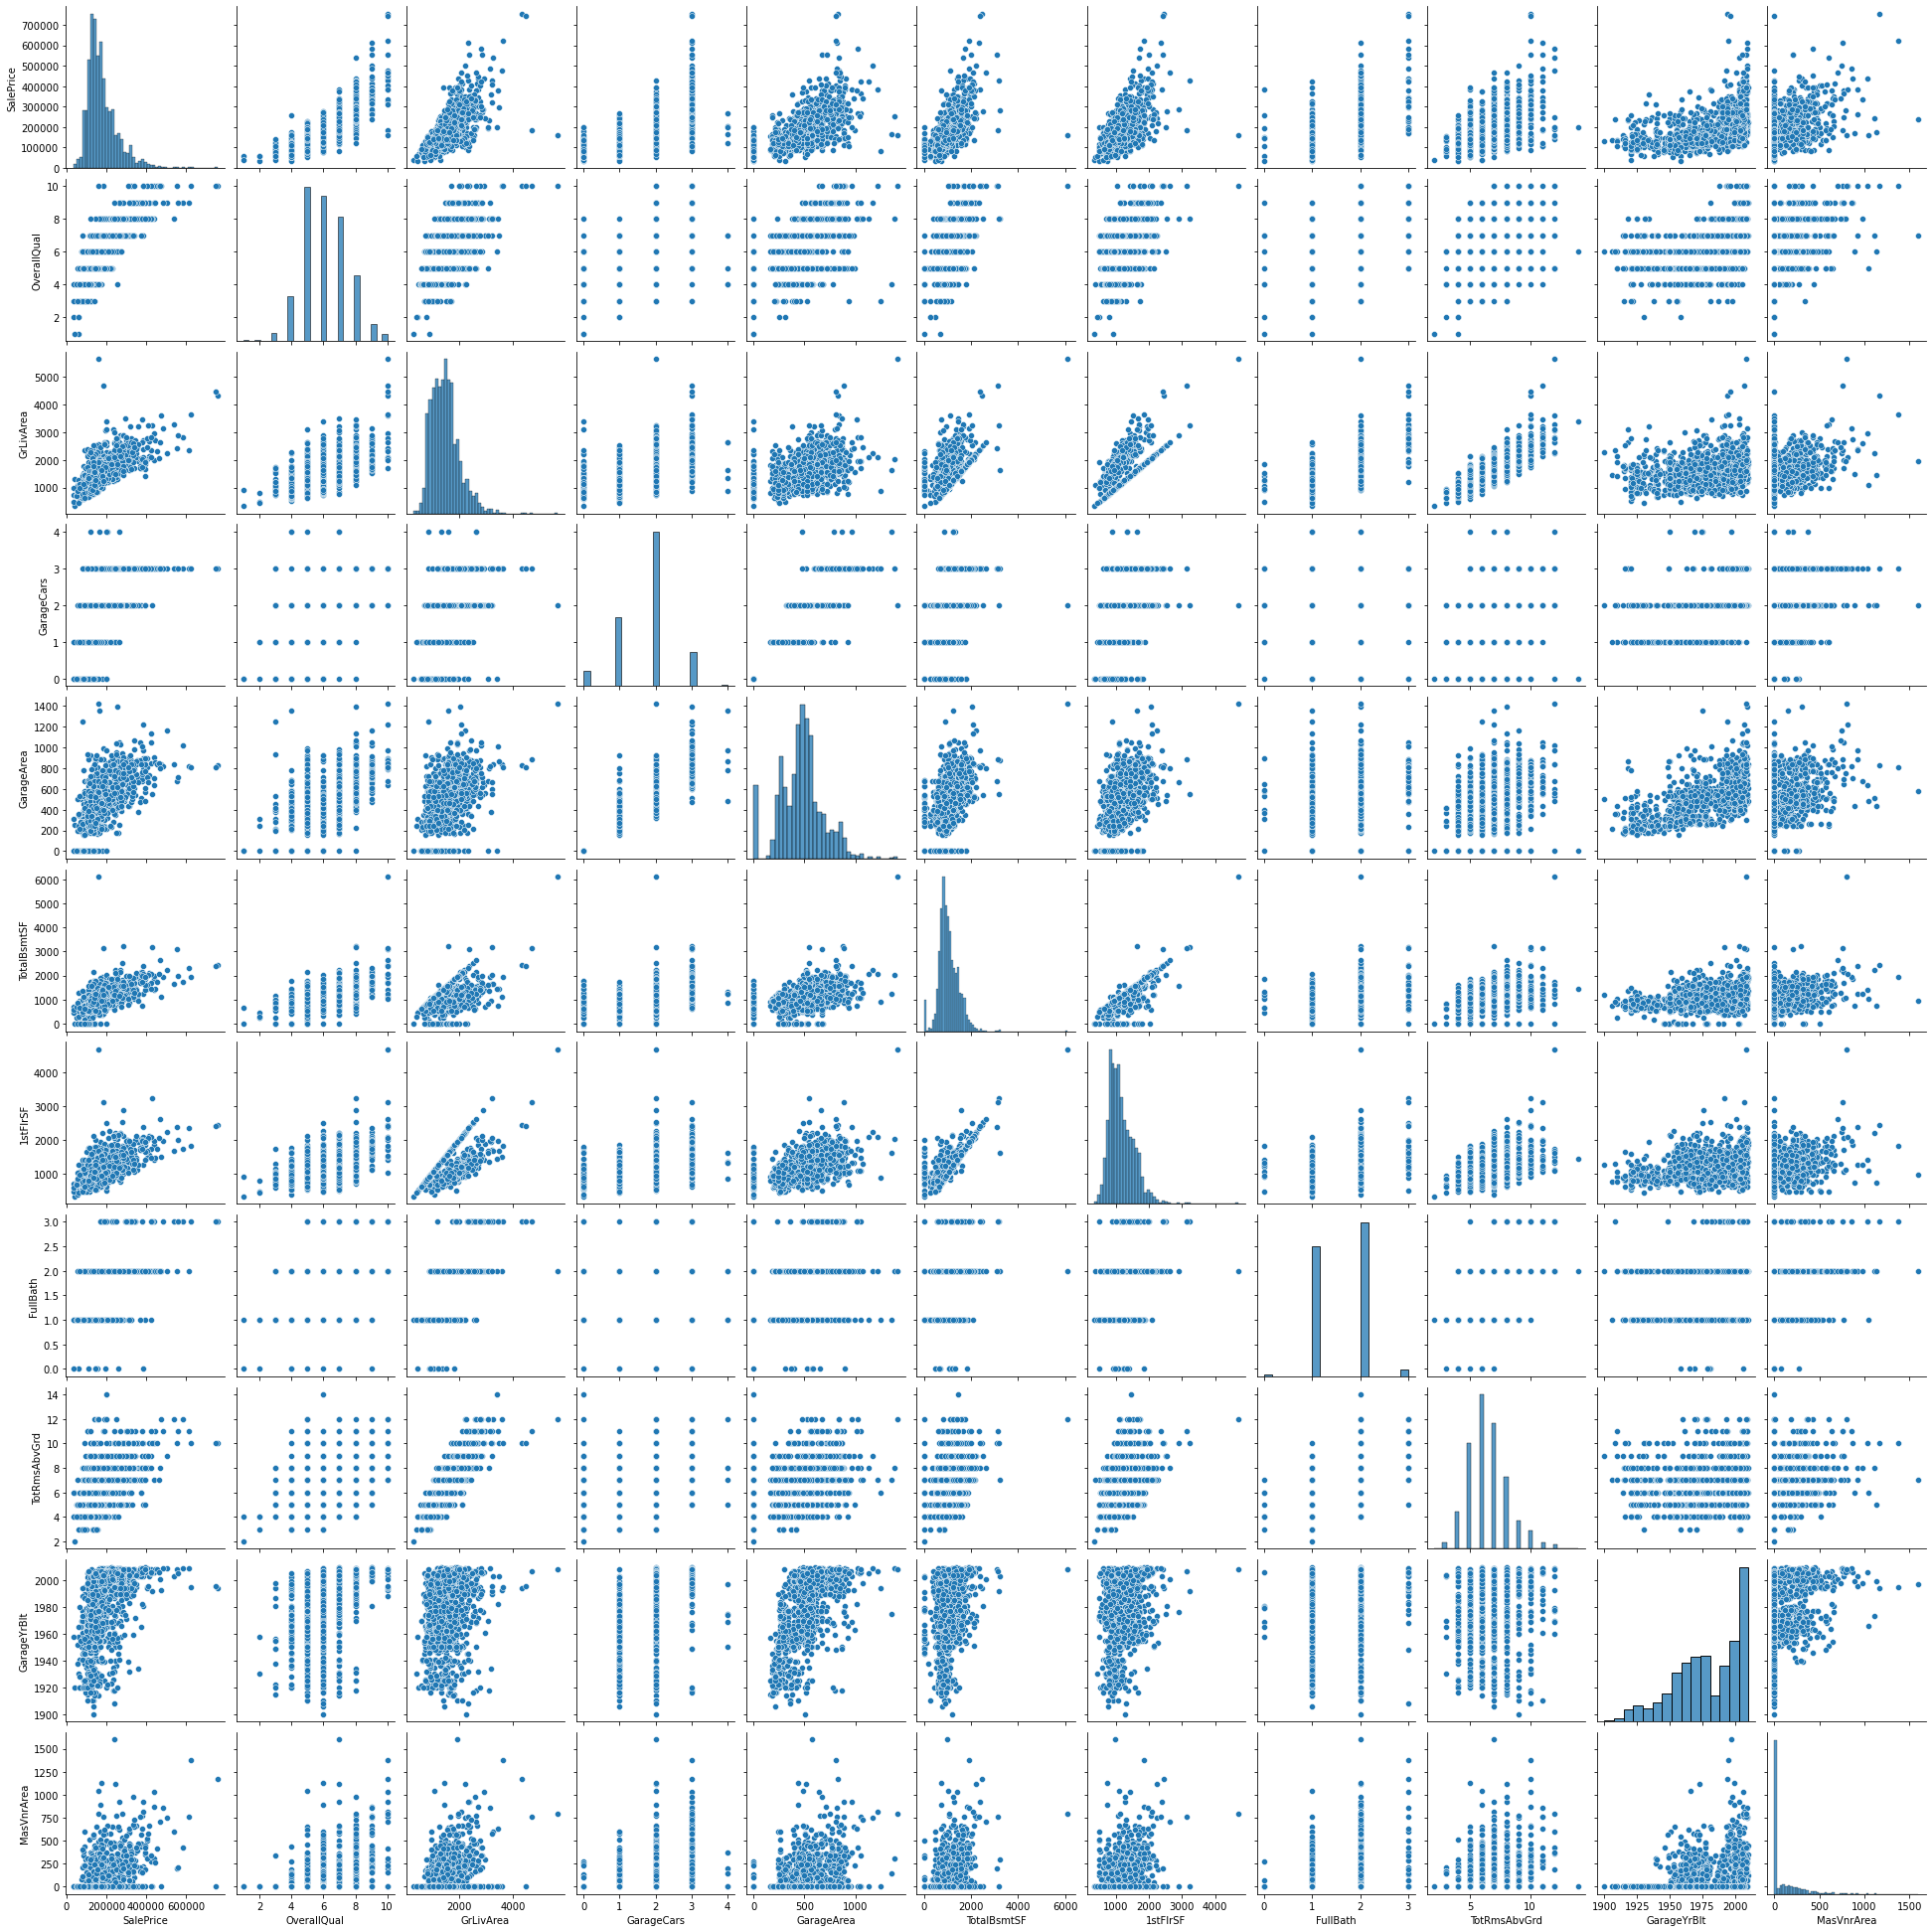

In [12]:

corr = original[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt',
       'MasVnrArea']]

sns.pairplot(corr)

### Make a heatmap in order to visualize in another way the correlations 2 to 2

<AxesSubplot:>

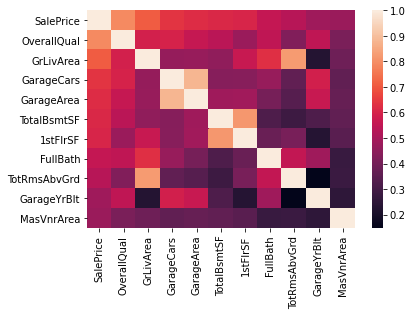

In [13]:

sns.heatmap(corr.corr())


### perform a regplot allowing to cross these variables with SalePrice

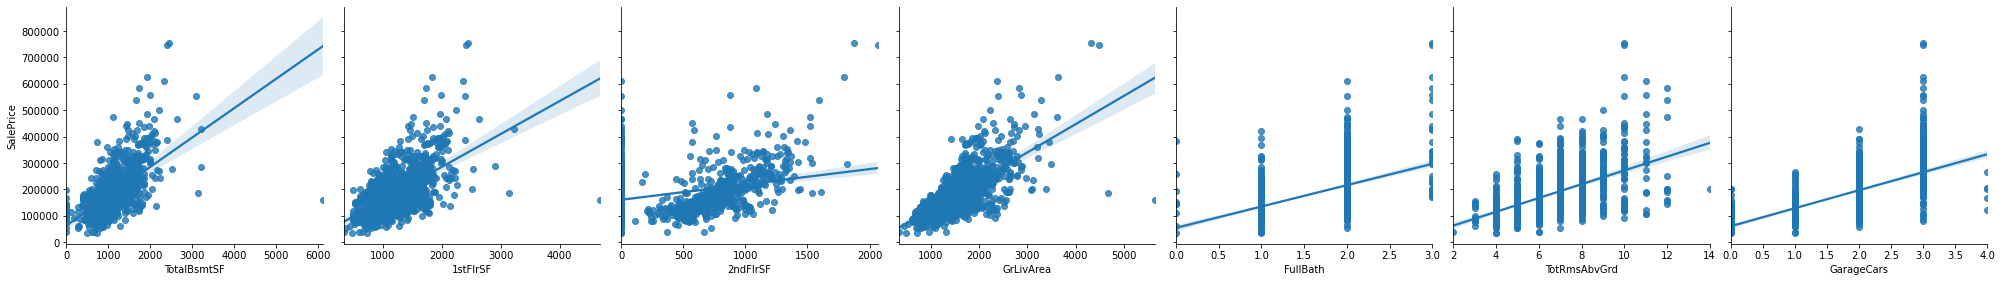

In [14]:
reg = original[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 
                'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]

g = sns.PairGrid(reg, y_vars=["SalePrice"], 
                 x_vars=["TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath",
                         "TotRmsAbvGrd", "GarageCars"], height=4)
g.map(sns.regplot)



### Display the jointplot with the coefficient of pearson for the crossing SalePrice & GrLivArea

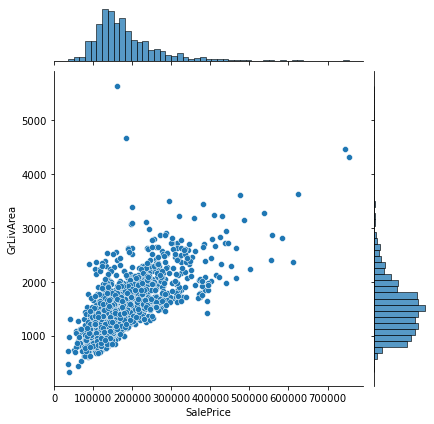

In [15]:
joint = original[['SalePrice','GrLivArea']]

sns.jointplot(data=joint, x="SalePrice", y="GrLivArea")

### Create a code to automatically identify Object type variables

In [16]:
df2 = original.select_dtypes(include = ['object'])
df2.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

### use a countplot on all the variables

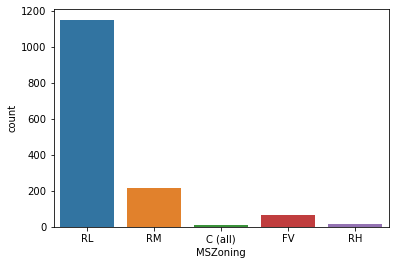

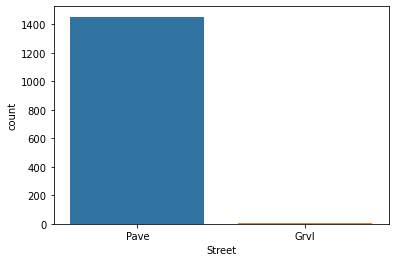

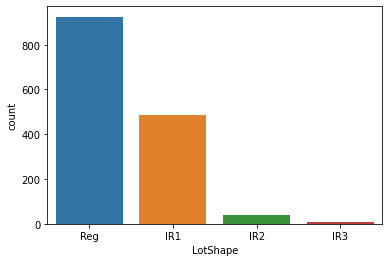

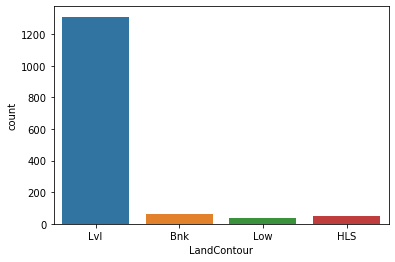

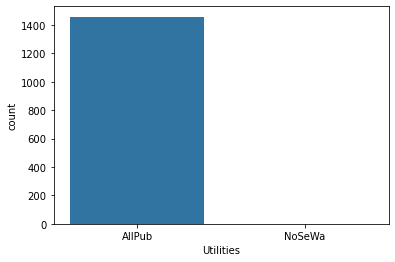

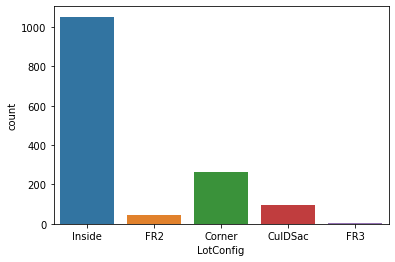

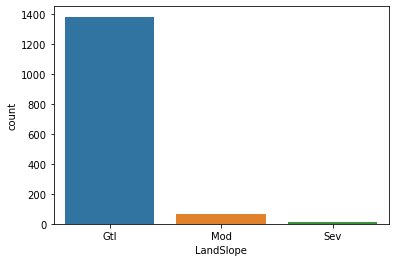

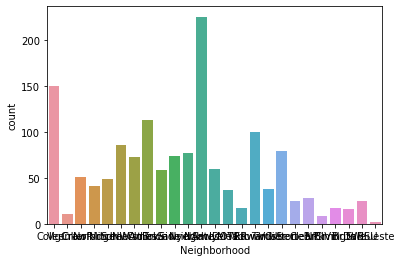

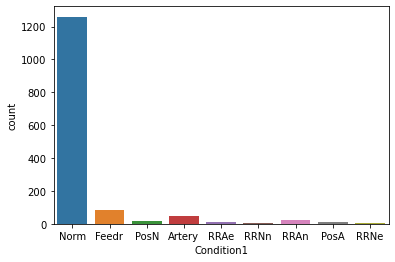

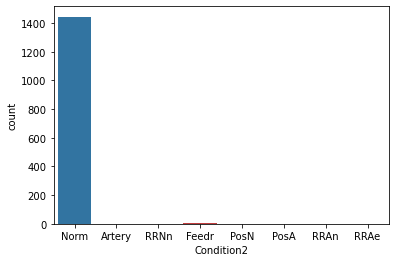

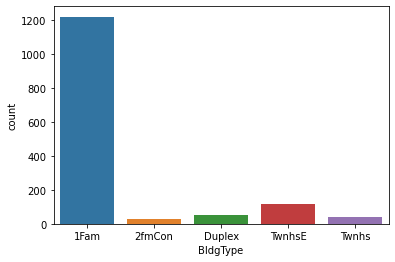

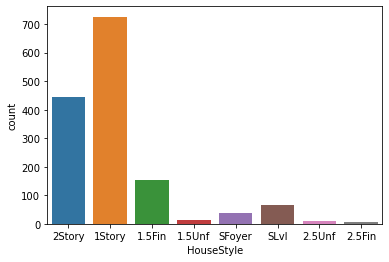

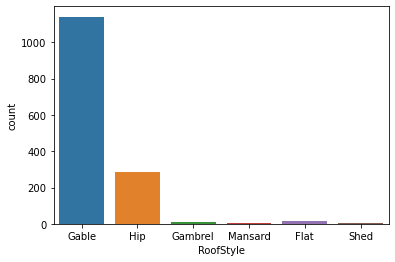

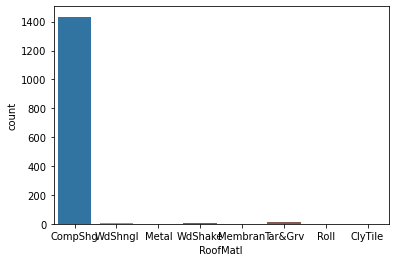

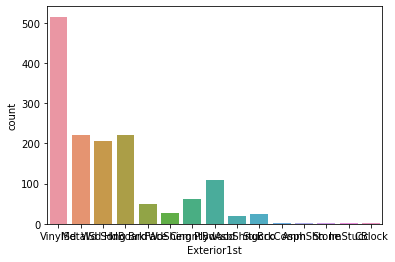

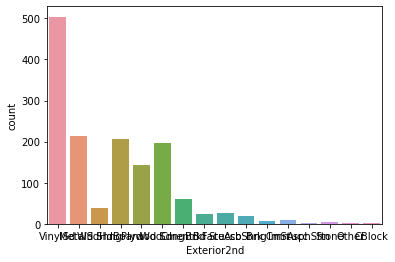

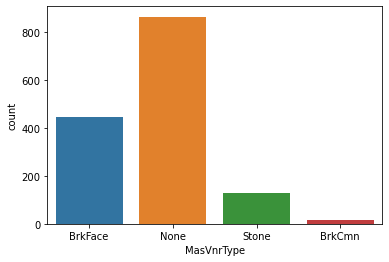

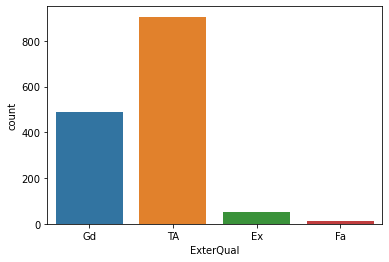

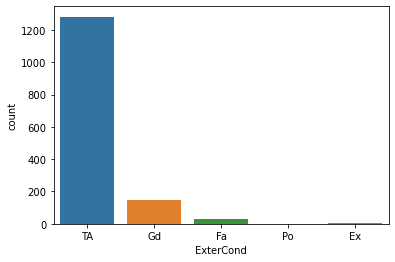

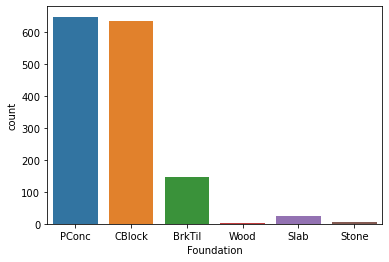

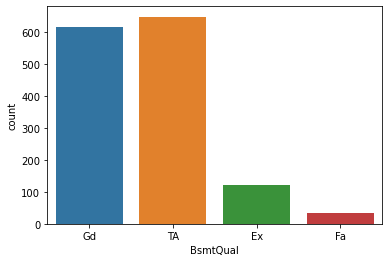

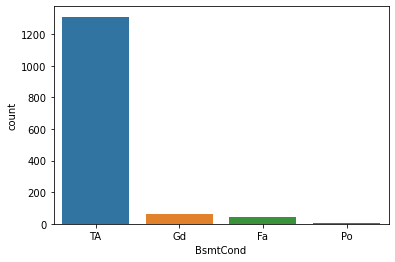

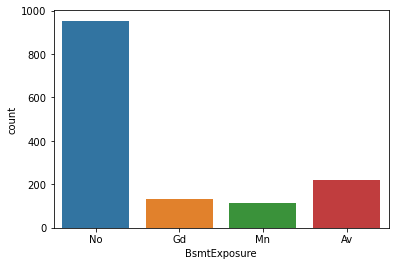

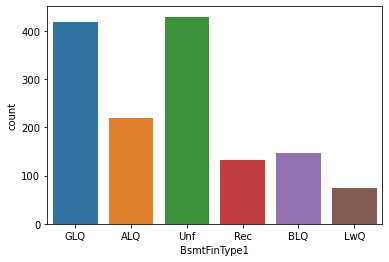

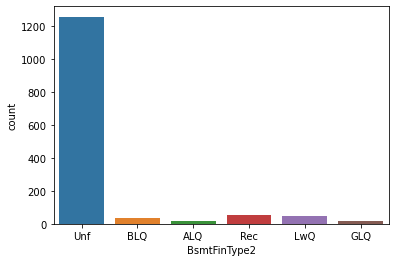

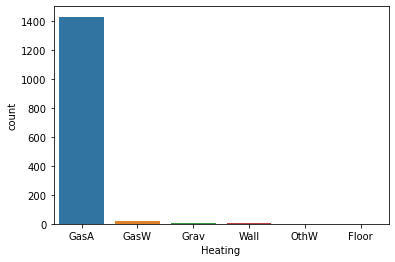

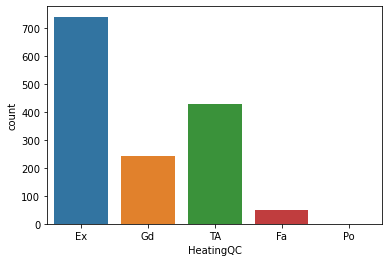

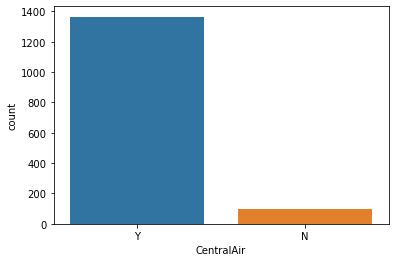

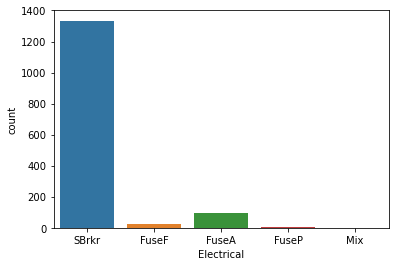

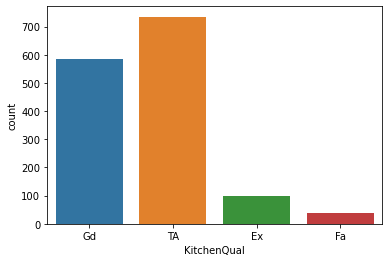

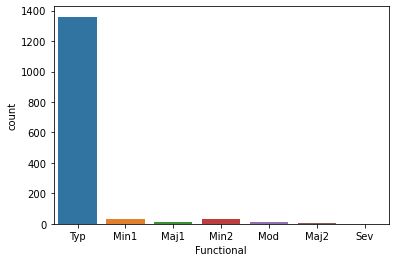

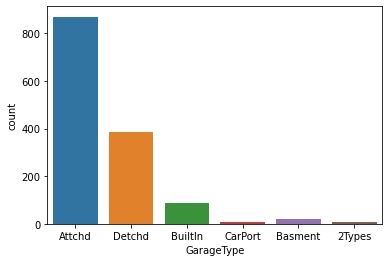

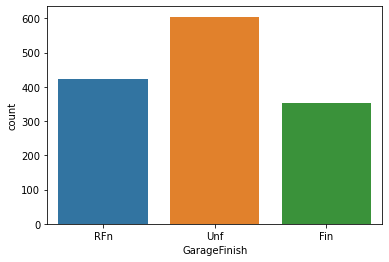

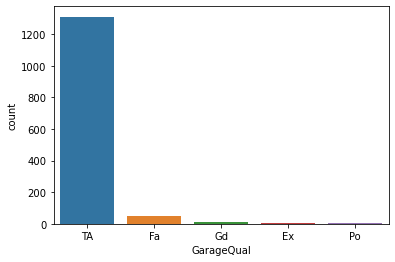

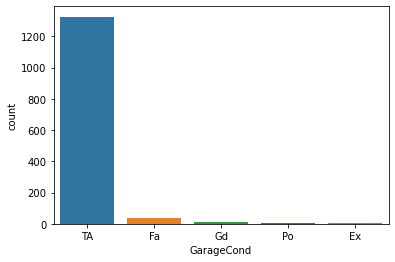

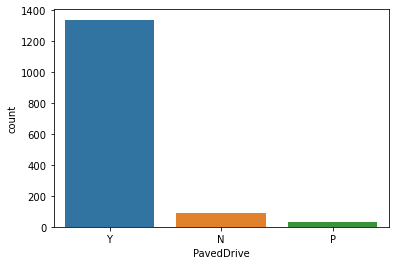

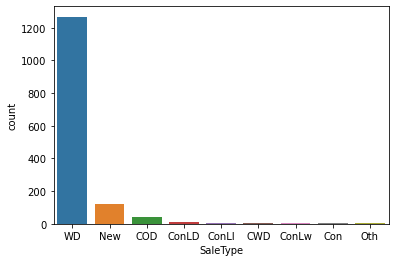

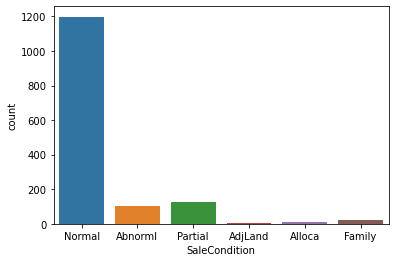

In [17]:
for col in df2.columns:
    sns.countplot(x=df2[col])
    plt.show()

### List at least 5 variables that do not seem relevant to you in explaining the price of a house.

In [18]:
df.corr().sort_values('SalePrice', ascending=True).index[0:6]

Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF'],
      dtype='object')

In [19]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


### Prediction using Linear Regression

In [44]:
feature_cols = ['OverallQual']
# , 'GrLivArea', 'GarageCars', 'GarageArea',
#        'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd'

In [45]:
X = df[feature_cols]
X

,OverallQual
0,7
1,6
2,7
3,7
4,8
...,...
1455,6
1456,6
1457,7
1458,5


In [46]:
y = df['SalePrice']


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [49]:
X_train.shape

(1095, 1)

In [50]:
y_tr57ain.shape

(1095,)

In [51]:
X_test.shape

(365, 1)

In [52]:
y_test.reset_index(drop = True)

0      231500
1      179500
2      122000
3       84500
4      142000
        ...  
360    187500
361    178000
362    125000
363    232000
364    135000
Name: SalePrice, Length: 365, dtype: int64

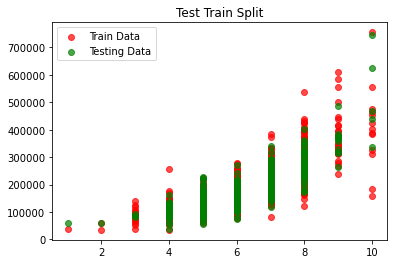

In [53]:
#Test train split visualzation
plt.scatter(X_train, y_train, label = 'Train Data', color = 'r', alpha = .7)
plt.scatter(X_test, y_test, label = 'Testing Data', color = 'g', alpha = .7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
#Create linear model and train it
linreg = LinearRegression()
linreg.fit(X_train,y_train)

#Use model to predict on Test Data
y_predict = linreg.predict(X_test)


In [72]:
linreg.intercept_

-92320.89715492204

In [73]:
linreg.coef_

array([44765.0366753])

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score", r2_score(y_test,y_predict))
print("RMSE", np.sqrt(mean_squared_error(y_test,y_predict)))

R2 Score 0.664003309917631
RMSE 47493.393231541995


In [75]:
from sklearn.linear_model import Ridge
R = Ridge(alpha = 1000)

In [76]:
R.fit(X_train, y_train)

Ridge(alpha=1000)

In [77]:
y_predict1 = R.predict(X_test)

In [78]:
print("R2 Score", r2_score(y_test,y_predict1))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_predict1)))

R2 Score 0.5775336489109644
RMSE 53255.168325529


In [79]:
from sklearn.linear_model import Lasso